In [36]:
#Reading Data
import json
import numpy as np
import pandas as pd  
import time
start=time.time()
ice = pd.read_json('train.json')
#test = pd.read_json('test.json')
print time.time()-start

1.81020116806


In [18]:
#Replace missing values in incidence angle by 0.
ice.inc_angle = ice.inc_angle.replace('na', 0)
ice.inc_angle = ice.inc_angle.astype(float).fillna(0.0)

In [19]:
#Store the bands of the training set in two different arrays.
band1 = []
band2 = []

for i in range(1604):
    band1.append(np.reshape(ice.iloc[i,0],(75,75)))
    band2.append(np.reshape(ice.iloc[i,1],(75,75)))



In [4]:
##Store the bands of the testing set in two different arrays.

test_band1 = []
test_band2 = []

for i in range(8424):
    test_band1.append(np.reshape(test.iloc[i,0],(75,75)))
    test_band2.append(np.reshape(test.iloc[i,1],(75,75)))

In [20]:
#Converting bands of training and testing sets to type float.
band1 = np.array(band1,dtype='f')
band2 = np.array(band2,dtype='f')
test_band1 = np.array(test_band1,dtype='f')
test_band2 = np.array(test_band2,dtype='f')

In [21]:
#Take Average of both bands of training set and store it in a new variable. 
new_band = []
for i in range(1604):
    new_band.append((band1[i] +band2[i])/2)
new_band = np.array(new_band,dtype='f')
new_band.shape

(1604, 75, 75)

In [22]:
#Take Average of both bands of testing set and store it in a new variable. 

test_new_band=[]
for i in range(8424):
    test_new_band.append((test_band1[i] + test_band2[i])/2)
test_new_band = np.array(test_new_band,dtype='f')
test_new_band.shape

(8424, 75, 75)

In [23]:
#The values present in bands 1 and 2 are radar signal values. For easy interpretability take the inverse sign of the values as most of the values are negative.
#Training Set
for i in range(1604):
    new_band[i] = np.negative(new_band[i])
    band1[i] = np.negative(band1[i])
    band2[i] = np.negative(band2[i])
    
#Testing Set
for i in range(8424):
    test_new_band[i] = np.negative(test_new_band[i])
    test_band1[i] = np.negative(test_band1[i])
    test_band2[i] = np.negative(test_band2[i])

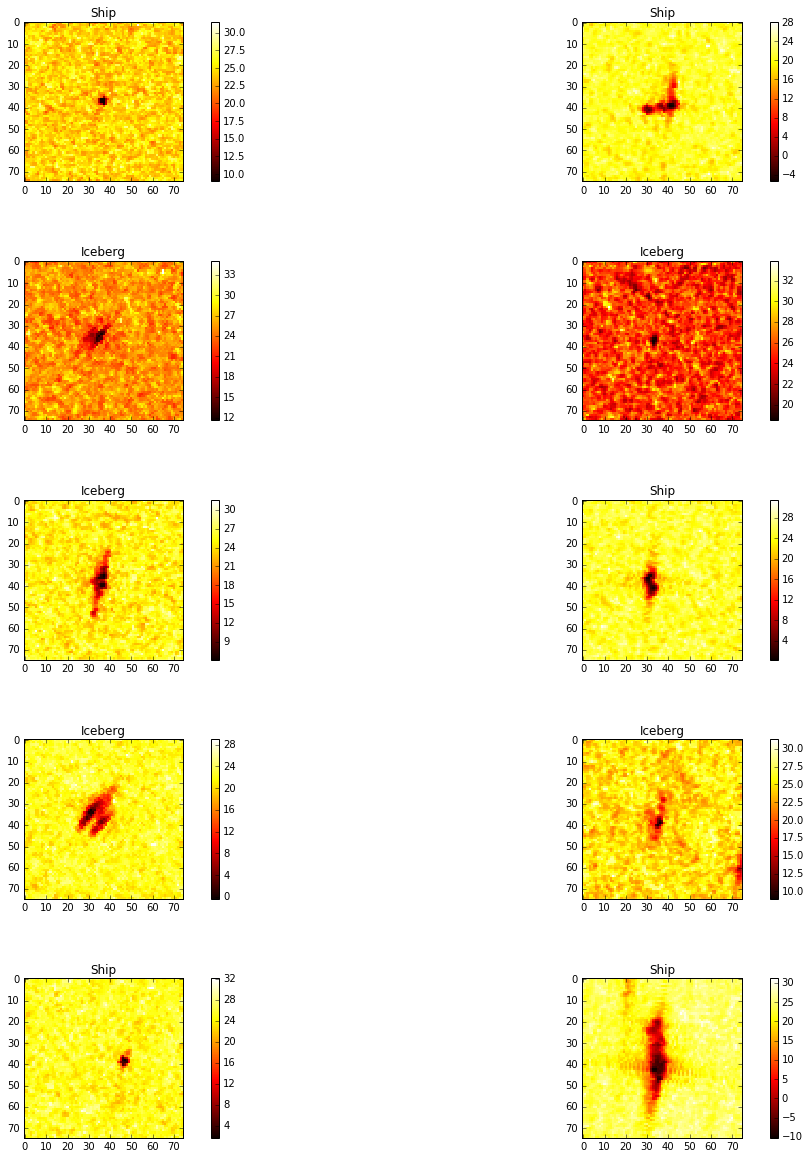

In [9]:
#Visualizing Data
#Since the signs have been inversed these are the inversed images for 10 randomly generated samples of new_band variable
#in the training set
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import random

#Randomly generate 10 unique numbers from the range of 0-1604
random_int = random.sample(range(0,1604),10)
object_class = np.array(ice.iloc[random_int,4])
class_label=[]
for i in range(len(object_class)):
    if object_class[i] == 0:
        class_label.append("Ship")
    else:
        class_label.append("Iceberg")
i=0
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.001)

for image in random_int:
    ax = fig.add_subplot(5,2,i+1)
    im = plt.imshow(new_band[image], cmap='hot', interpolation='none')
    ax.imshow(new_band[image], cmap='hot', interpolation='none')
    plt.title(class_label[i])
    i+=1
    cbar = plt.colorbar(im)
plt.savefig("A")


In [24]:
#Subtracting each row of each pixel by the max value. 

#The intuition behind doing this is, in the previous cell we reversed the sign of the signal values. Now the plot of an image
#looks like a depression in the middle(indicating the object to classify) surrounded by sea or other objects present at a higher level.
#The plot of such an image can be seen in the previous cell. So ideally we would like our object to classify(ship/iceberg) to be
#at an elevated level than it's surrounding and to enhance this differentiation the values present in a row is subtracted
# from the maximum value of that particular row. So thereby the ships and icebergs can distinctly be differentiated from it's 
#surroundings.

#Training Set
for i in range(1604):
    for j in range(75):
        new_band[i][j] = np.max(new_band[i][j]) - new_band[i][j]
        band1[i][j] = np.max(band1[i][j]) - band1[i][j]
        band2[i][j] = np.max(band2[i][j]) - band2[i][j]

#Testing Set
for i in range(8424):
    for j in range(75):
        test_new_band[i][j] = np.max(test_new_band[i][j]) - test_new_band[i][j]
        test_band1[i][j] = np.max(test_band1[i][j]) - test_band1[i][j]
        test_band2[i][j] = np.max(test_band2[i][j]) - test_band2[i][j]

In [11]:
#Feature Extraction
new_band_max=[]
band1_max=[]
band2_max=[]
for i in range(1604):
    new_band_max.append(np.mean(new_band[i]))
    band1_max.append(np.percentile(band1[i],75))
    band2_max.append(np.max(band2[i]))
    

In [12]:
iceberg=[]
ship=[]
for i,val in enumerate(ice.is_iceberg):
    if val == 0:
        ship.append(i)
    else:
        iceberg.append(i)

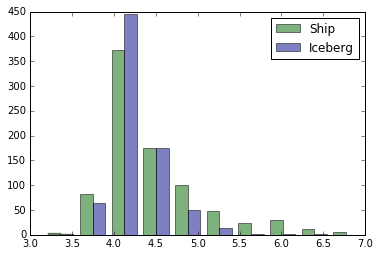

In [13]:
band1_max = np.array(new_band_max)
plt.hist([band1_max[ship], band1_max[iceberg]], color=['darkgreen','darkblue'], alpha=0.5,label=['Ship','Iceberg'])
plt.legend(loc='upper right')
#plt.show()
plt.savefig('band2max.jpg')

In [23]:
#3D Visualization of ships and icebergs.
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

def ThreeD(data):

    data=[
    go.Surface(z=new_band[data])
    ]
    layout = go.Layout(
    title='Iceberg/Ship',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [ ]:
#Randomly select icebergs
random_ice = random.sample(iceberg,10)
for i in random_ice:
    ThreeD(i)

In [59]:
ThreeD(27)

In [ ]:
#Randomly select ships
random_ship = random.sample(ship,10)
for i in random_ship:
    ThreeD(i)

In [25]:
#Normalize each sample of training and testing sets.
from sklearn.preprocessing import normalize

#Training Set
for i in range(1604):
    new_band[i] = normalize(new_band[i], axis=1, norm='l2')
    band1[i] = normalize(band1[i],axis=1,norm='l2')
    band2[i] = normalize(band2[i],axis=1,norm='l2')

#Testing Set
for i in range(8424):
    test_band1[i] = normalize(test_band1[i], axis=1, norm='l1')
    test_band2[i] = normalize(test_band2[i], axis=1, norm='l1')
    test_new_band[i] = normalize(test_new_band[i], axis=1, norm='l1')

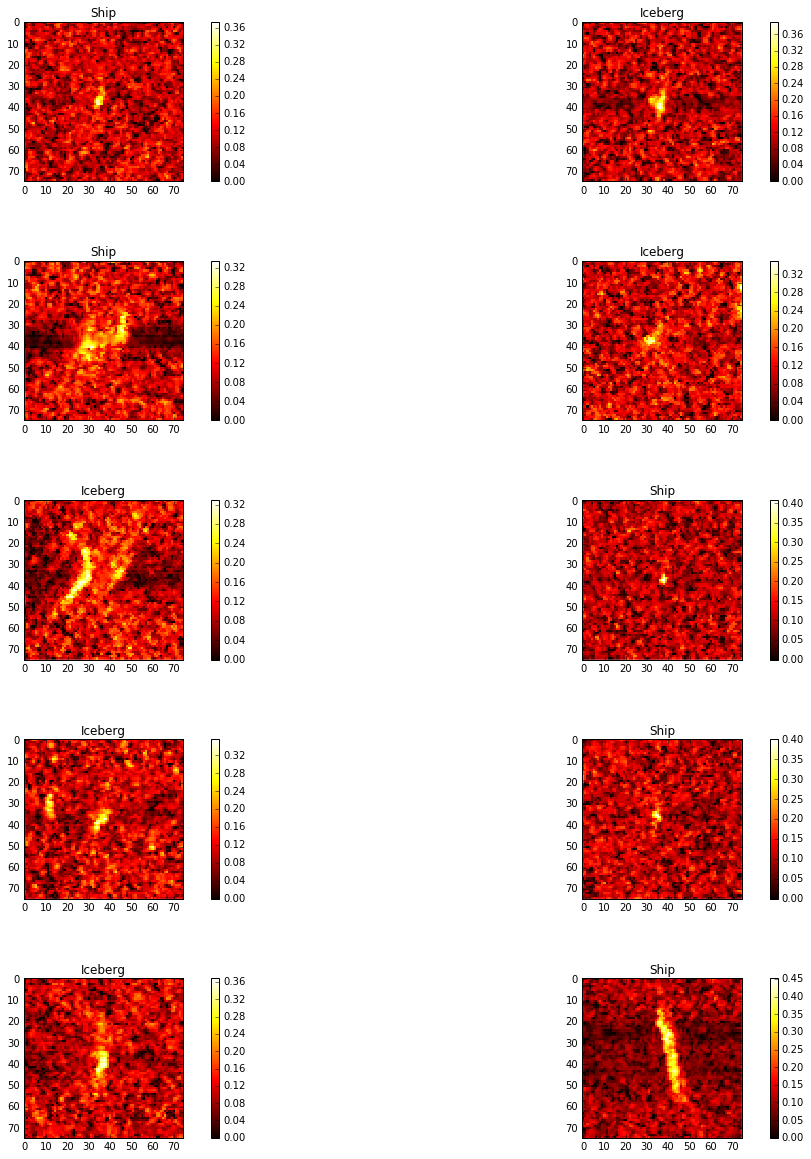

In [24]:
#Same images After subtraction of max and normalization of new_band

i=0
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.001)

for image in random_int:
    ax = fig.add_subplot(5,2,i+1)
    im = plt.imshow(new_band[image], cmap='hot', interpolation='none')
    ax.imshow(new_band[image], cmap='hot', interpolation='none')
    plt.title(class_label[i])
    i+=1
    cbar = plt.colorbar(im)
plt.savefig("After")



plt.hist(np.log2(band1max[iceberg]))

In [26]:
band1 = np.array(band1)
band1 = band1.reshape(band1.shape[0],75,75,1)
band1.shape

(1604, 75, 75, 1)

In [30]:
band2 = np.array(band2)
band2 = band2.reshape(band2.shape[0],75,75,1)
band2.shape

(1604, 75, 75, 1)

In [33]:
new_band = np.array(new_band)
new_band = new_band.reshape(new_band.shape[0],75,75,1)
new_band.shape

(1604, 75, 75, 1)

In [117]:
test_new_band = np.array(test_new_band)
test_new_band = test_new_band.reshape(test_new_band.shape[0],75,75,1)
test_new_band.shape

(8424, 75, 75, 1)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K
from keras.utils import plot_model
import pydot
K.set_image_dim_ordering('tf')

np.random.seed(1000)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75,75,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(GlobalMaxPooling2D())
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(new_band[:802],np_utils.to_categorical(ice.iloc[:802,4]),validation_data=(new_band[802:],np_utils.to_categorical(ice.iloc[802:,4])), 
          batch_size=32, nb_epoch=100, verbose=1,shuffle = True)
plot_model(model, to_file='model.png')


Train on 802 samples, validate on 802 samples
Epoch 1/100
802/802 [==============================] - 6s - loss: 0.6941 - acc: 0.4863 - val_loss: 0.6907 - val_acc: 0.6259
Epoch 2/100
802/802 [==============================] - 6s - loss: 0.6880 - acc: 0.5299 - val_loss: 0.6791 - val_acc: 0.6970
Epoch 3/100
802/802 [==============================] - 6s - loss: 0.6650 - acc: 0.6534 - val_loss: 0.6319 - val_acc: 0.69330
Epoch 4/100
802/802 [==============================] - 6s - loss: 0.6136 - acc: 0.6671 - val_loss: 0.5804 - val_acc: 0.6858
Epoch 5/100
802/802 [==============================] - 6s - loss: 0.5591 - acc: 0.7095 - val_loss: 0.5317 - val_acc: 0.7406
Epoch 6/100
802/802 [==============================] - 6s - loss: 0.5446 - acc: 0.7195 - val_loss: 0.5419 - val_acc: 0.7145
Epoch 7/100
802/802 [==============================] - 6s - loss: 0.5099 - acc: 0.7544 - val_loss: 0.4941 - val_acc: 0.7494
Epoch 8/100
802/802 [==============================] - 6s - loss: 0.5136 - acc: 0.743

802/802 [==============================] - 6s - loss: 0.0982 - acc: 0.9613 - val_loss: 0.4511 - val_acc: 0.8204
Epoch 67/100
802/802 [==============================] - 6s - loss: 0.0906 - acc: 0.9688 - val_loss: 0.4669 - val_acc: 0.8342
Epoch 68/100
802/802 [==============================] - 6s - loss: 0.1236 - acc: 0.9439 - val_loss: 0.6232 - val_acc: 0.7756
Epoch 69/100
802/802 [==============================] - 6s - loss: 0.1073 - acc: 0.9651 - val_loss: 0.4520 - val_acc: 0.8292
Epoch 70/100
802/802 [==============================] - 6s - loss: 0.0818 - acc: 0.9751 - val_loss: 0.6347 - val_acc: 0.7781
Epoch 71/100
802/802 [==============================] - 6s - loss: 0.1324 - acc: 0.9426 - val_loss: 0.5083 - val_acc: 0.8292
Epoch 72/100
802/802 [==============================] - 6s - loss: 0.0982 - acc: 0.9688 - val_loss: 0.4592 - val_acc: 0.8354
Epoch 73/100
802/802 [==============================] - 6s - loss: 0.0861 - acc: 0.9688 - val_loss: 0.5147 - val_acc: 0.8142
Epoch 74/100


In [62]:
final_prediction = model.predict_proba(vertical_stack_test,verbose=1)


8424/8424 [==============================] - 72s    


In [63]:
result=pd.read_csv('sample_iceberg.csv')
predi = pd.DataFrame(final_prediction)
nresult=pd.DataFrame()
nresult['id'] = test['id']
nresult['is_iceberg'] = predi.iloc[:,1]
nresult.to_csv('result.csv', index=False)


'"predi.columns=[\'0\',\'is_iceberg\']\nresult.iloc[:,1] = predi.iloc[:,1]\nprint(result)'